In [ ]:
#Beacon Nicolas Mkhabele Feature Engineering project
# feature engineering project

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np 
import pandas as pd 
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
from patsy import dmatrices
import sklearn
import seaborn as sns
from scipy.stats import skew, norm
from scipy.stats import chi2_contingency

In [ ]:
path = "/content/engineering_project/PEP1.csv"

In [ ]:
dataframe=pd.read_csv(path)

In [ ]:
dataframe.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
#Question 1a)	Identify the shape of the dataset
print(dataframe.shape)

(1460, 81)


In [ ]:
#Question 1b) Identify variables with null values

null_values = dataframe.isnull()
print(null_values)

         Id  MSSubClass  MSZoning  LotFrontage  LotArea  Street  Alley  \
0     False       False     False        False    False   False   True   
1     False       False     False        False    False   False   True   
2     False       False     False        False    False   False   True   
3     False       False     False        False    False   False   True   
4     False       False     False        False    False   False   True   
...     ...         ...       ...          ...      ...     ...    ...   
1455  False       False     False        False    False   False   True   
1456  False       False     False        False    False   False   True   
1457  False       False     False        False    False   False   True   
1458  False       False     False        False    False   False   True   
1459  False       False     False        False    False   False   True   

      LotShape  LandContour  Utilities  ...  PoolArea  PoolQC  Fence  \
0        False        False      False 

In [ ]:
#Question c)	Identify variables with unique values

for column in dataframe.columns:
    unique_values = dataframe[column].unique()
    print(f"Unique values in {column}:")
    print(unique_values)
    #here I am printing the variables with unique values

Unique values in Id:
[   1    2    3 ... 1458 1459 1460]
Unique values in MSSubClass:
[ 60  20  70  50 190  45  90 120  30  85  80 160  75 180  40]
Unique values in MSZoning:
['RL' 'RM' 'C (all)' 'FV' 'RH']
Unique values in LotFrontage:
[ 65.  80.  68.  60.  84.  85.  75.  nan  51.  50.  70.  91.  72.  66.
 101.  57.  44. 110.  98.  47. 108. 112.  74. 115.  61.  48.  33.  52.
 100.  24.  89.  63.  76.  81.  95.  69.  21.  32.  78. 121. 122.  40.
 105.  73.  77.  64.  94.  34.  90.  55.  88.  82.  71. 120. 107.  92.
 134.  62.  86. 141.  97.  54.  41.  79. 174.  99.  67.  83.  43. 103.
  93.  30. 129. 140.  35.  37. 118.  87. 116. 150. 111.  49.  96.  59.
  36.  56. 102.  58.  38. 109. 130.  53. 137.  45. 106. 104.  42.  39.
 144. 114. 128. 149. 313. 168. 182. 138. 160. 152. 124. 153.  46.]
Unique values in LotArea:
[ 8450  9600 11250 ... 17217 13175  9717]
Unique values in Street:
['Pave' 'Grvl']
Unique values in Alley:
[nan 'Grvl' 'Pave']
Unique values in LotShape:
['Reg' 'IR1' 'IR2' 

In [ ]:
#Question 2	Generating a dataset for numerical variables

numerical_dataframe = dataframe.select_dtypes(include=['int', 'float'])
# Printing the numerical dataset
print("Numerical Dataset:")
print(numerical_dataframe)

Numerical Dataset:
        Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  \
0        1          60         65.0     8450            7            5   
1        2          20         80.0     9600            6            8   
2        3          60         68.0    11250            7            5   
3        4          70         60.0     9550            7            5   
4        5          60         84.0    14260            8            5   
...    ...         ...          ...      ...          ...          ...   
1455  1456          60         62.0     7917            6            5   
1456  1457          20         85.0    13175            6            6   
1457  1458          70         66.0     9042            7            9   
1458  1459          20         68.0     9717            5            6   
1459  1460          20         75.0     9937            5            6   

      YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  WoodDeckSF  \
0          2003   

In [ ]:
#Question 2	Generating a dataset for categorical variables

categorical_dataframe = dataframe.select_dtypes(include=['object'])
#printing the categorical dataset
print("\nCategorical Dataset:")
print(categorical_dataframe)


Categorical Dataset:
     MSZoning Street Alley LotShape LandContour Utilities LotConfig LandSlope  \
0          RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1          RL   Pave   NaN      Reg         Lvl    AllPub       FR2       Gtl   
2          RL   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl   
3          RL   Pave   NaN      IR1         Lvl    AllPub    Corner       Gtl   
4          RL   Pave   NaN      IR1         Lvl    AllPub       FR2       Gtl   
...       ...    ...   ...      ...         ...       ...       ...       ...   
1455       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1456       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1457       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1458       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1459       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   

     

In [ ]:
#Question 3	EDA of numerical variables a)	Missing value treatment

# Checking the count of missing values in each column
missing_values = dataframe.isnull().sum()
print(missing_values)

# Replace missing values with appropriate treatment (e.g., mean, median, or a specific value)
dataframe.fillna(dataframe.mean(), inplace=True)

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64


<ipython-input-14-d0c725522440>:8: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataframe.fillna(dataframe.mean(), inplace=True)


In [ ]:
print(dataframe.dropna()) # Drops rows with any missing value

Empty DataFrame
Columns: [Id, MSSubClass, MSZoning, LotFrontage, LotArea, Street, Alley, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, Bedroom, Kitchen, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, FireplaceQu, GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, PoolQC, Fence, MiscFeature, MiscVal, MoSold, YrSold, SaleType, SaleCondition, SalePrice]
Index: []

[0 rows x 81 columns]


In [ ]:
print(dataframe.fillna(dataframe.mean(), inplace=True))

None


<ipython-input-16-f1a4c8e0d4e3>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(dataframe.fillna(dataframe.mean(), inplace=True))


In [ ]:
print(dataframe.fillna(method='bfill', inplace=True))

None


Column: Id
count    1460.000000
mean      730.500000
std       421.610009
min         1.000000
25%       365.750000
50%       730.500000
75%      1095.250000
max      1460.000000
Name: Id, dtype: float64
----------------------


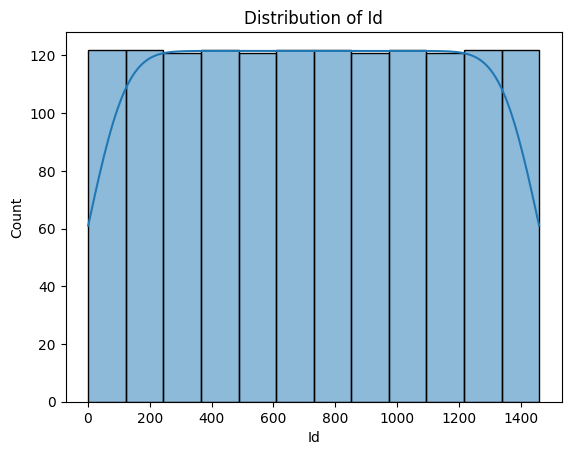

Column: MSSubClass
count    1460.000000
mean       56.897260
std        42.300571
min        20.000000
25%        20.000000
50%        50.000000
75%        70.000000
max       190.000000
Name: MSSubClass, dtype: float64
----------------------


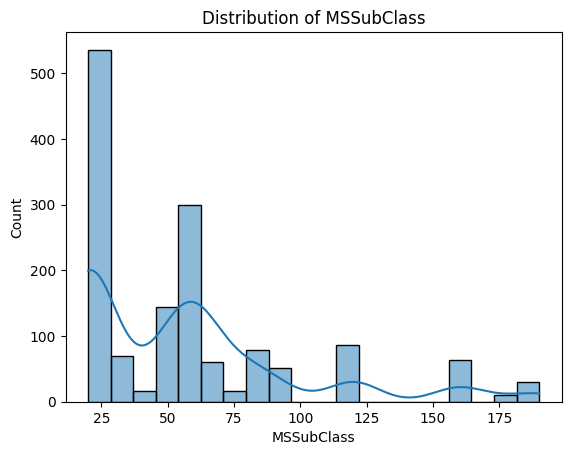

Column: LotFrontage
count    1460.000000
mean       70.049958
std        22.024023
min        21.000000
25%        60.000000
50%        70.049958
75%        79.000000
max       313.000000
Name: LotFrontage, dtype: float64
----------------------


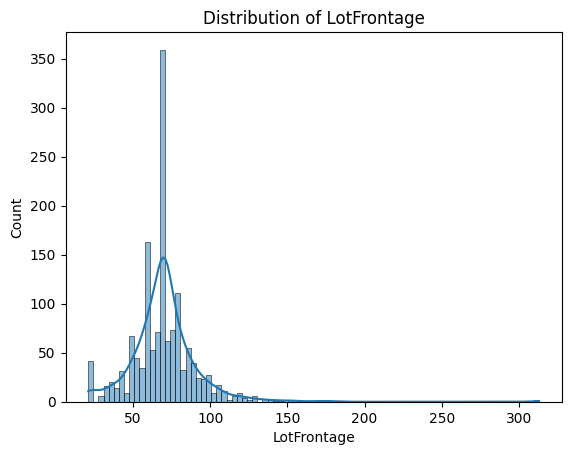

Column: LotArea
count      1460.000000
mean      10516.828082
std        9981.264932
min        1300.000000
25%        7553.500000
50%        9478.500000
75%       11601.500000
max      215245.000000
Name: LotArea, dtype: float64
----------------------


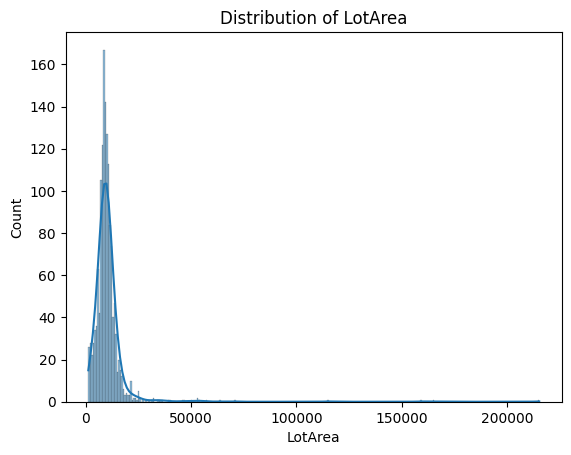

Column: OverallQual
count    1460.000000
mean        6.099315
std         1.382997
min         1.000000
25%         5.000000
50%         6.000000
75%         7.000000
max        10.000000
Name: OverallQual, dtype: float64
----------------------


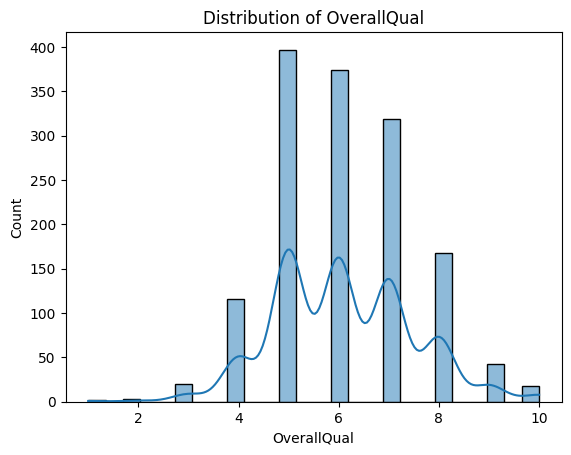

Column: OverallCond
count    1460.000000
mean        5.575342
std         1.112799
min         1.000000
25%         5.000000
50%         5.000000
75%         6.000000
max         9.000000
Name: OverallCond, dtype: float64
----------------------


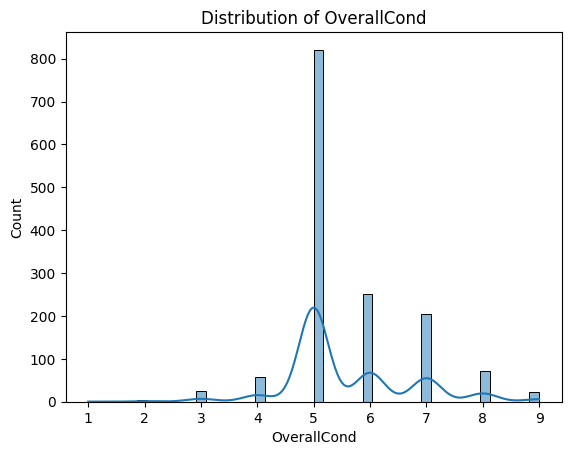

Column: YearBuilt
count    1460.000000
mean     1971.267808
std        30.202904
min      1872.000000
25%      1954.000000
50%      1973.000000
75%      2000.000000
max      2010.000000
Name: YearBuilt, dtype: float64
----------------------


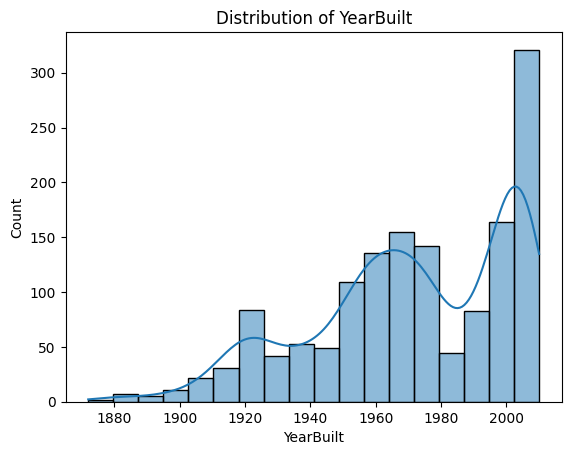

Column: YearRemodAdd
count    1460.000000
mean     1984.865753
std        20.645407
min      1950.000000
25%      1967.000000
50%      1994.000000
75%      2004.000000
max      2010.000000
Name: YearRemodAdd, dtype: float64
----------------------


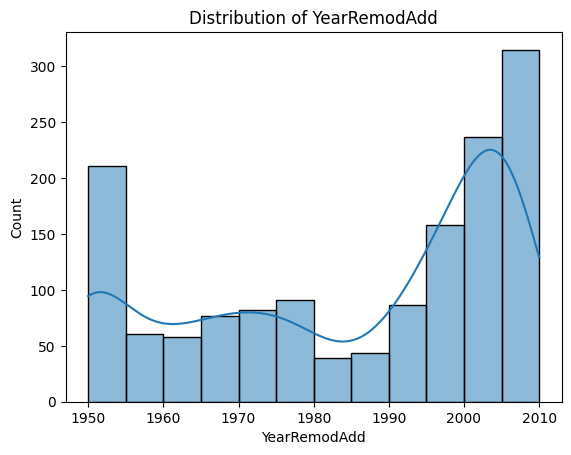

Column: MasVnrArea
count    1460.000000
mean      103.685262
std       180.569112
min         0.000000
25%         0.000000
50%         0.000000
75%       164.250000
max      1600.000000
Name: MasVnrArea, dtype: float64
----------------------


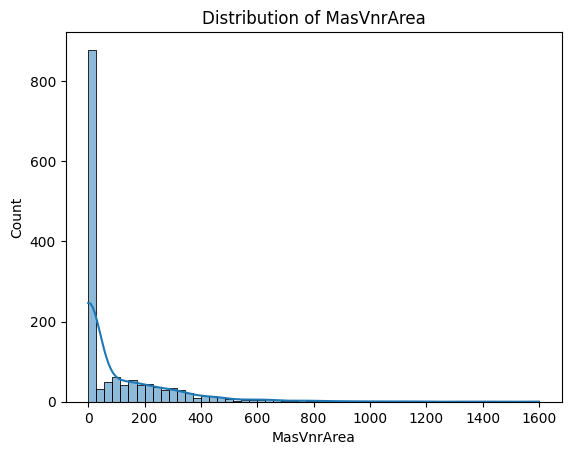

Column: BsmtFinSF1
count    1460.000000
mean      443.639726
std       456.098091
min         0.000000
25%         0.000000
50%       383.500000
75%       712.250000
max      5644.000000
Name: BsmtFinSF1, dtype: float64
----------------------


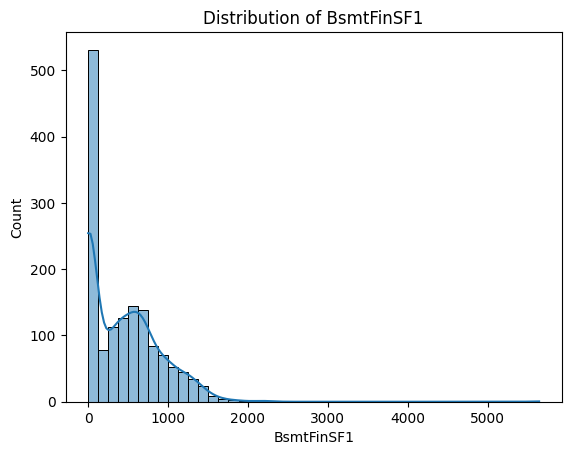

Column: BsmtFinSF2
count    1460.000000
mean       46.549315
std       161.319273
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max      1474.000000
Name: BsmtFinSF2, dtype: float64
----------------------


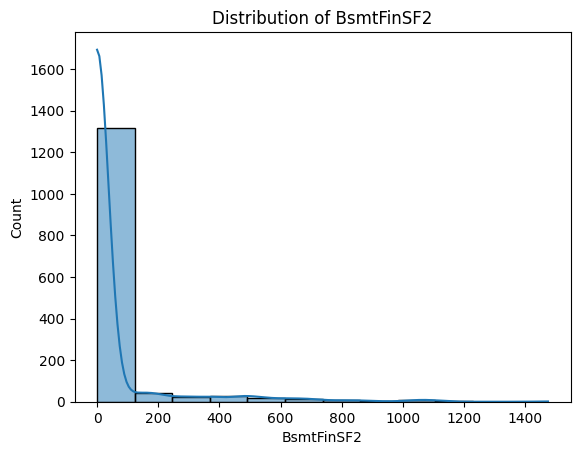

Column: BsmtUnfSF
count    1460.000000
mean      567.240411
std       441.866955
min         0.000000
25%       223.000000
50%       477.500000
75%       808.000000
max      2336.000000
Name: BsmtUnfSF, dtype: float64
----------------------


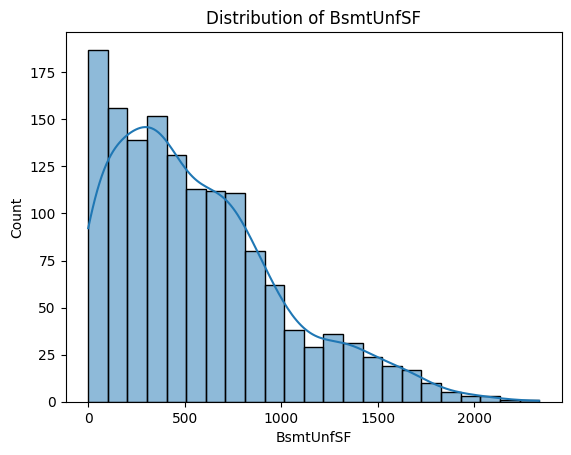

Column: TotalBsmtSF
count    1460.000000
mean     1057.429452
std       438.705324
min         0.000000
25%       795.750000
50%       991.500000
75%      1298.250000
max      6110.000000
Name: TotalBsmtSF, dtype: float64
----------------------


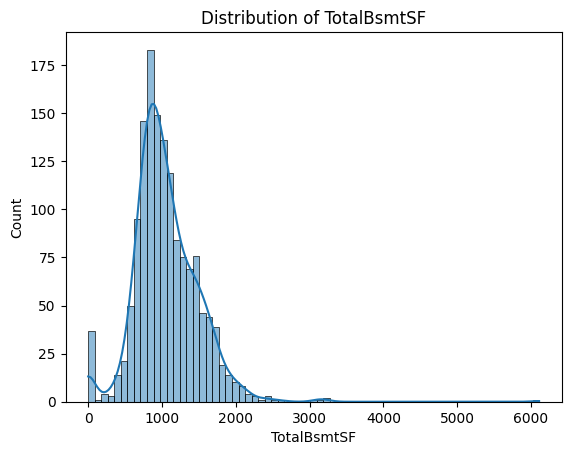

Column: 1stFlrSF
count    1460.000000
mean     1162.626712
std       386.587738
min       334.000000
25%       882.000000
50%      1087.000000
75%      1391.250000
max      4692.000000
Name: 1stFlrSF, dtype: float64
----------------------


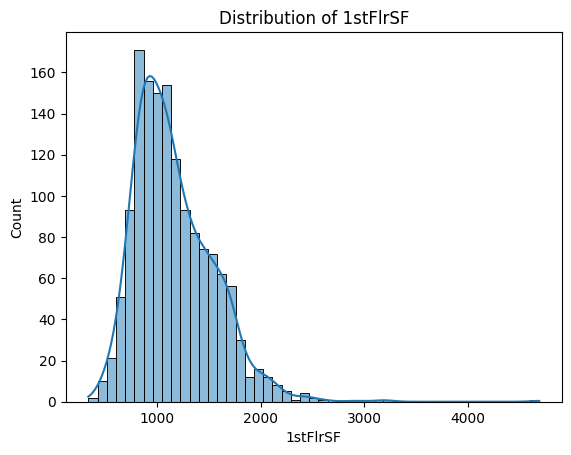

Column: 2ndFlrSF
count    1460.000000
mean      346.992466
std       436.528436
min         0.000000
25%         0.000000
50%         0.000000
75%       728.000000
max      2065.000000
Name: 2ndFlrSF, dtype: float64
----------------------


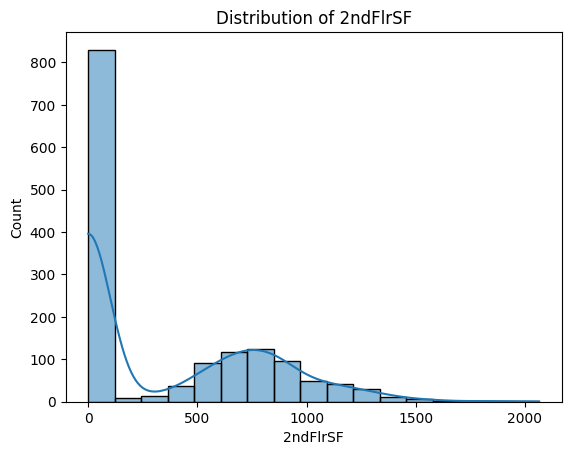

Column: LowQualFinSF
count    1460.000000
mean        5.844521
std        48.623081
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       572.000000
Name: LowQualFinSF, dtype: float64
----------------------


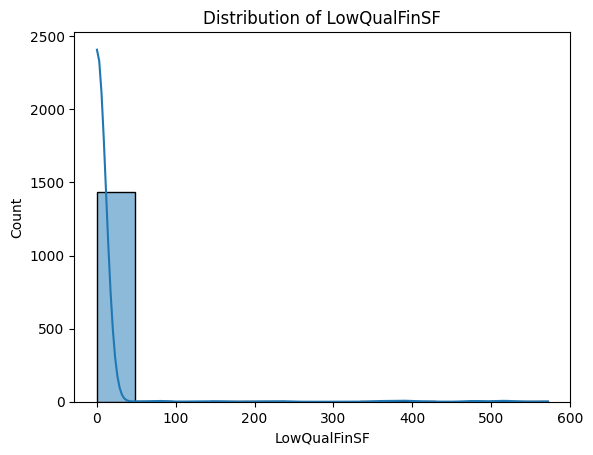

Column: GrLivArea
count    1460.000000
mean     1515.463699
std       525.480383
min       334.000000
25%      1129.500000
50%      1464.000000
75%      1776.750000
max      5642.000000
Name: GrLivArea, dtype: float64
----------------------


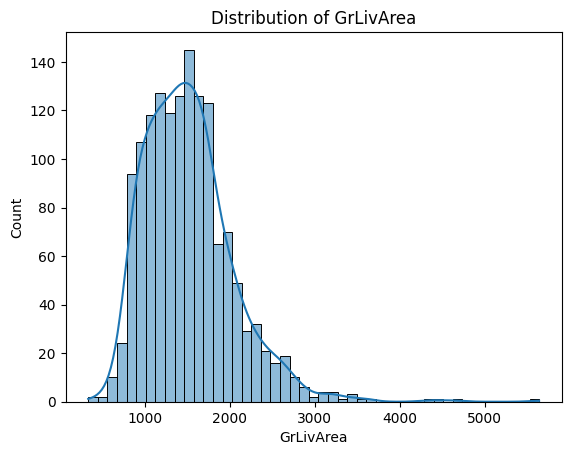

Column: BsmtFullBath
count    1460.000000
mean        0.425342
std         0.518911
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         3.000000
Name: BsmtFullBath, dtype: float64
----------------------


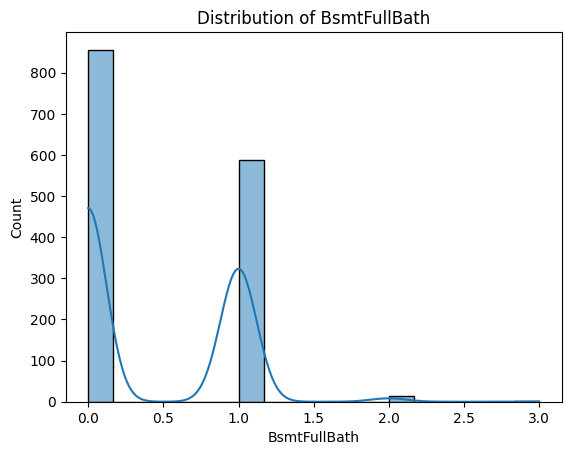

Column: BsmtHalfBath
count    1460.000000
mean        0.057534
std         0.238753
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         2.000000
Name: BsmtHalfBath, dtype: float64
----------------------


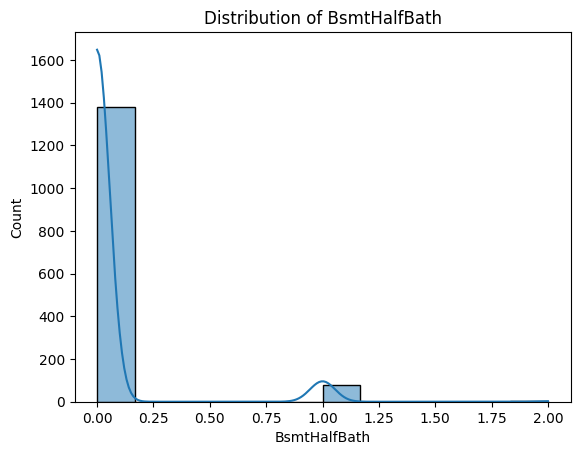

Column: FullBath
count    1460.000000
mean        1.565068
std         0.550916
min         0.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         3.000000
Name: FullBath, dtype: float64
----------------------


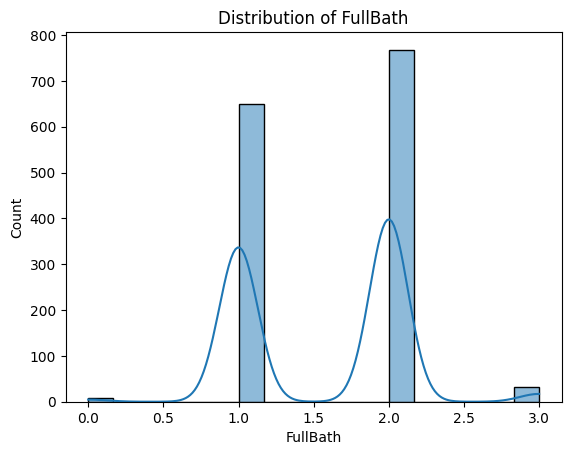

Column: HalfBath
count    1460.000000
mean        0.382877
std         0.502885
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         2.000000
Name: HalfBath, dtype: float64
----------------------


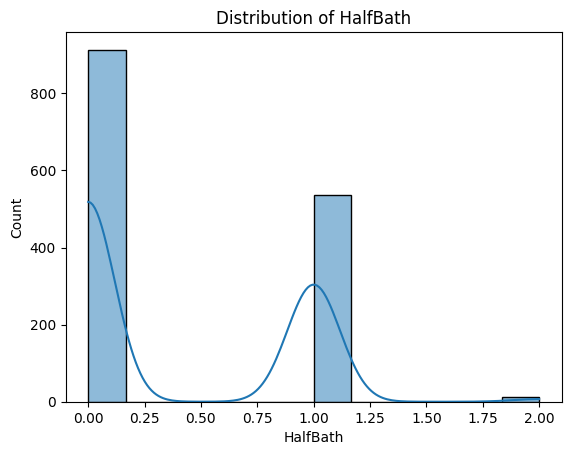

Column: Bedroom
count    1460.000000
mean        2.866438
std         0.815778
min         0.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         8.000000
Name: Bedroom, dtype: float64
----------------------


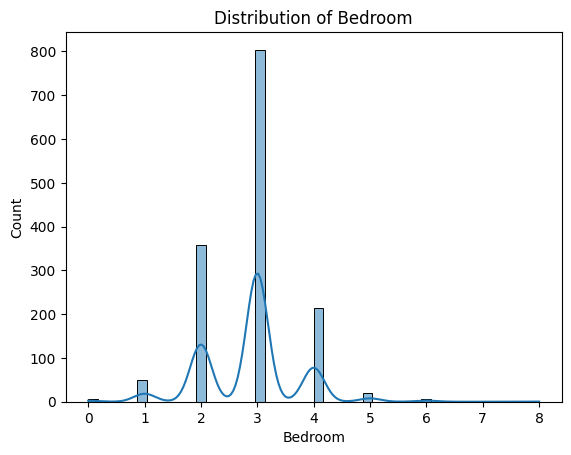

Column: Kitchen
count    1460.000000
mean        1.046575
std         0.220338
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         3.000000
Name: Kitchen, dtype: float64
----------------------


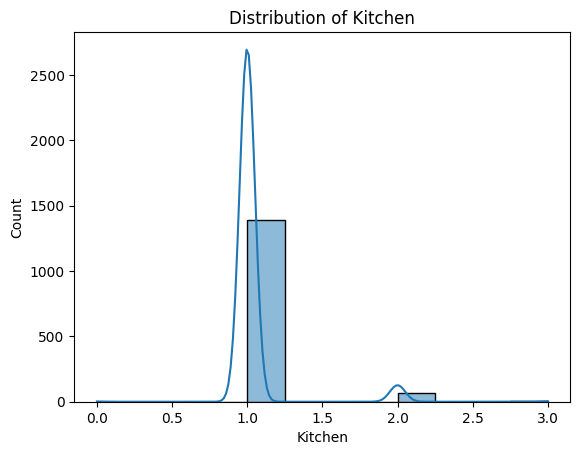

Column: TotRmsAbvGrd
count    1460.000000
mean        6.517808
std         1.625393
min         2.000000
25%         5.000000
50%         6.000000
75%         7.000000
max        14.000000
Name: TotRmsAbvGrd, dtype: float64
----------------------


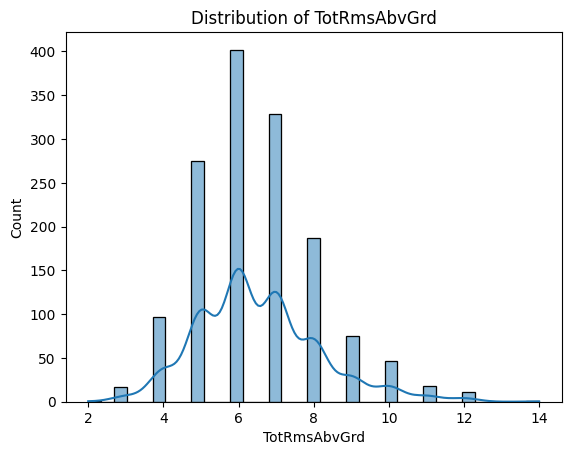

Column: Fireplaces
count    1460.000000
mean        0.613014
std         0.644666
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         3.000000
Name: Fireplaces, dtype: float64
----------------------


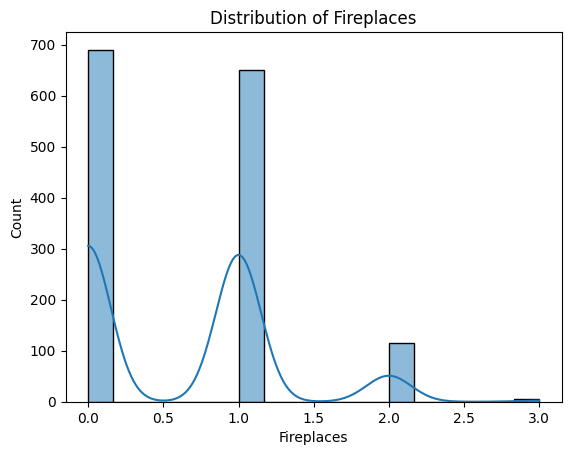

Column: GarageYrBlt
count    1460.000000
mean     1978.506164
std        23.994583
min      1900.000000
25%      1962.000000
50%      1978.506164
75%      2001.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64
----------------------


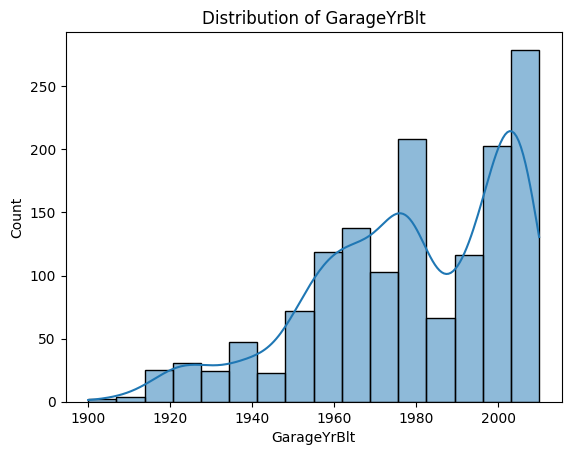

Column: GarageCars
count    1460.000000
mean        1.767123
std         0.747315
min         0.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         4.000000
Name: GarageCars, dtype: float64
----------------------


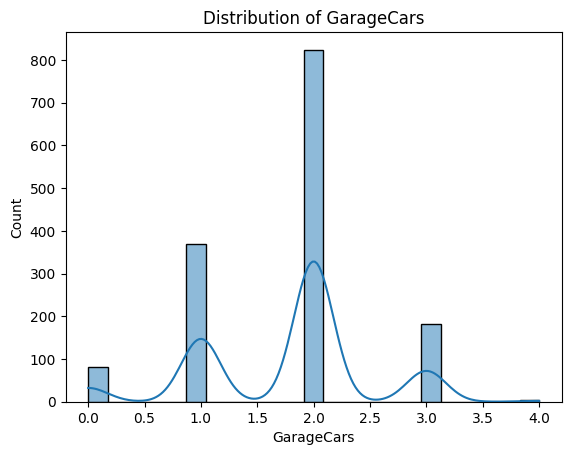

Column: GarageArea
count    1460.000000
mean      472.980137
std       213.804841
min         0.000000
25%       334.500000
50%       480.000000
75%       576.000000
max      1418.000000
Name: GarageArea, dtype: float64
----------------------


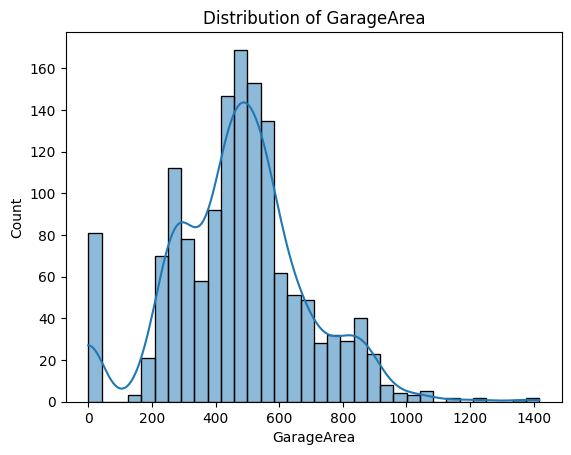

Column: WoodDeckSF
count    1460.000000
mean       94.244521
std       125.338794
min         0.000000
25%         0.000000
50%         0.000000
75%       168.000000
max       857.000000
Name: WoodDeckSF, dtype: float64
----------------------


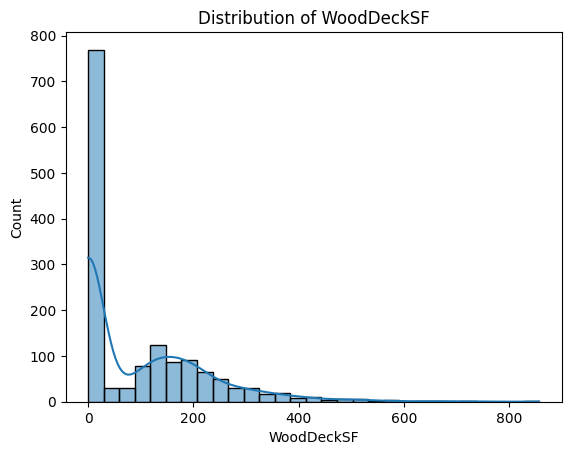

Column: OpenPorchSF
count    1460.000000
mean       46.660274
std        66.256028
min         0.000000
25%         0.000000
50%        25.000000
75%        68.000000
max       547.000000
Name: OpenPorchSF, dtype: float64
----------------------


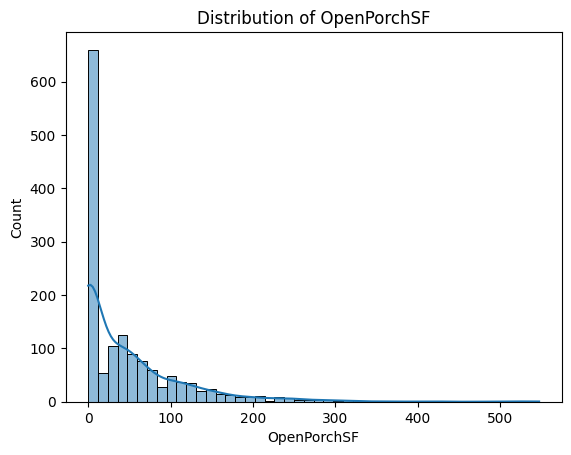

Column: EnclosedPorch
count    1460.000000
mean       21.954110
std        61.119149
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       552.000000
Name: EnclosedPorch, dtype: float64
----------------------


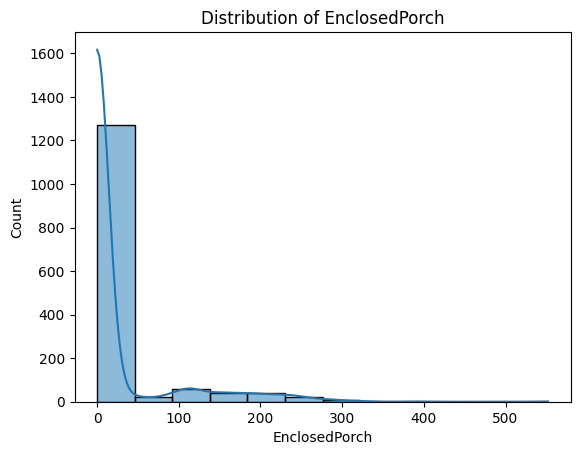

Column: 3SsnPorch
count    1460.000000
mean        3.409589
std        29.317331
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       508.000000
Name: 3SsnPorch, dtype: float64
----------------------


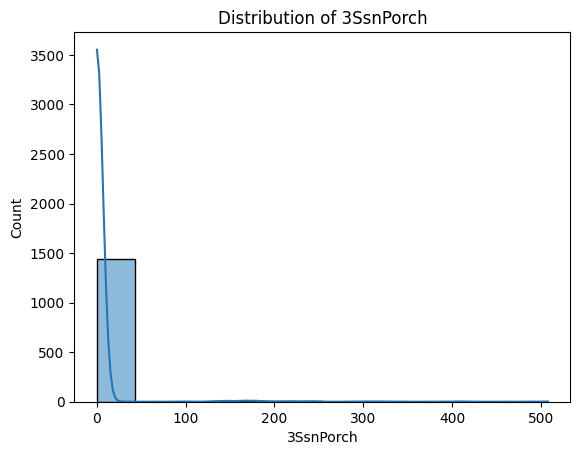

Column: ScreenPorch
count    1460.000000
mean       15.060959
std        55.757415
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       480.000000
Name: ScreenPorch, dtype: float64
----------------------


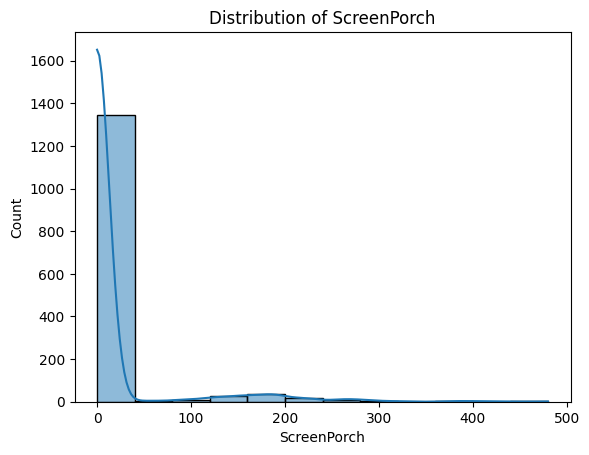

Column: PoolArea
count    1460.000000
mean        2.758904
std        40.177307
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       738.000000
Name: PoolArea, dtype: float64
----------------------


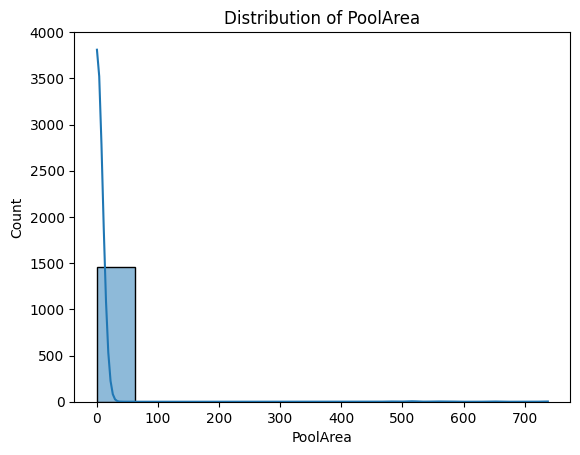

Column: MiscVal
count     1460.000000
mean        43.489041
std        496.123024
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      15500.000000
Name: MiscVal, dtype: float64
----------------------


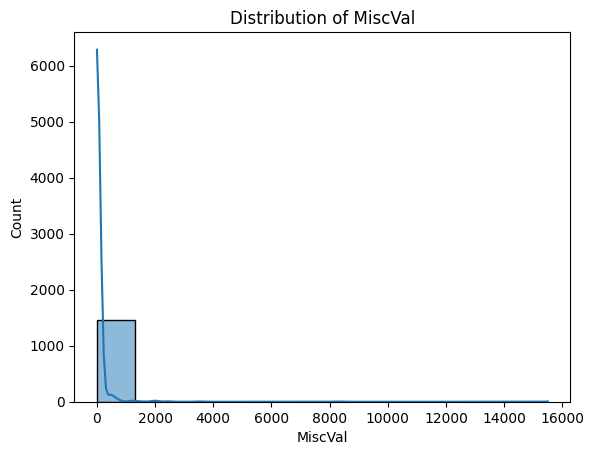

Column: MoSold
count    1460.000000
mean        6.321918
std         2.703626
min         1.000000
25%         5.000000
50%         6.000000
75%         8.000000
max        12.000000
Name: MoSold, dtype: float64
----------------------


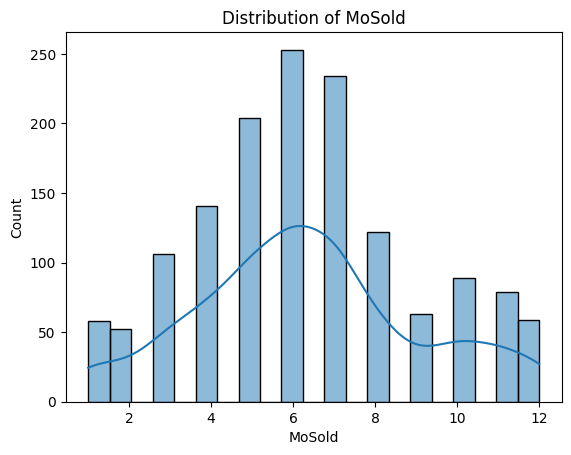

Column: YrSold
count    1460.000000
mean     2007.815753
std         1.328095
min      2006.000000
25%      2007.000000
50%      2008.000000
75%      2009.000000
max      2010.000000
Name: YrSold, dtype: float64
----------------------


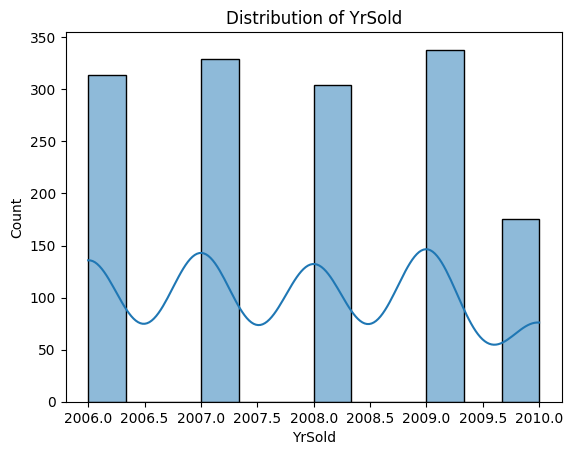

Column: SalePrice
count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64
----------------------


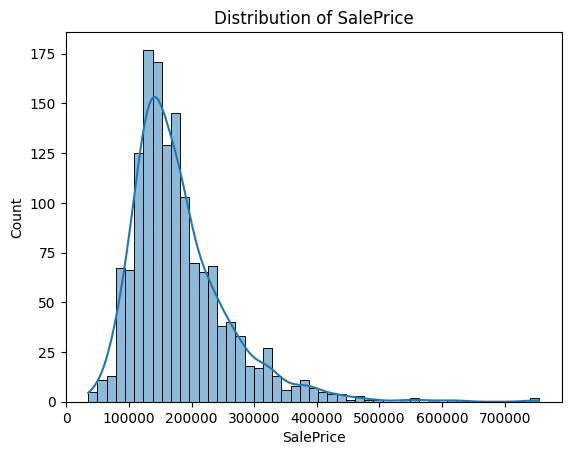

In [ ]:
#Question 3b)	Identify the skewness and distribution

numerical_cols = dataframe.select_dtypes(include='number').columns

for col in numerical_cols:
    # Summary statistics
    print(f"Column: {col}")
    print(dataframe[col].describe())
    print("----------------------")
    
    # Skewness and distribution
    sns.histplot(dataframe[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

In [ ]:
#c.	Identify significant variables using a correlation matrix

corr_matrix = dataframe.corr()

<ipython-input-19-d946bd53fb51>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = dataframe.corr()


In [ ]:
threshold = 0.5
print(corr_matrix[abs(corr_matrix) > threshold].stack().drop_duplicates().reset_index())

         level_0       level_1         0
0             Id            Id  1.000000
1    OverallQual     YearBuilt  0.572323
2    OverallQual  YearRemodAdd  0.550684
3    OverallQual   TotalBsmtSF  0.537808
4    OverallQual     GrLivArea  0.593007
5    OverallQual      FullBath  0.550600
6    OverallQual   GarageYrBlt  0.518018
7    OverallQual    GarageCars  0.600671
8    OverallQual    GarageArea  0.562022
9    OverallQual     SalePrice  0.790982
10     YearBuilt  YearRemodAdd  0.592855
11     YearBuilt   GarageYrBlt  0.780555
12     YearBuilt    GarageCars  0.537850
13     YearBuilt     SalePrice  0.522897
14  YearRemodAdd   GarageYrBlt  0.618130
15  YearRemodAdd     SalePrice  0.507101
16    BsmtFinSF1   TotalBsmtSF  0.522396
17    BsmtFinSF1  BsmtFullBath  0.649212
18   TotalBsmtSF      1stFlrSF  0.819530
19   TotalBsmtSF     SalePrice  0.613581
20      1stFlrSF     GrLivArea  0.566024
21      1stFlrSF     SalePrice  0.605852
22      2ndFlrSF     GrLivArea  0.687501
23      2ndFlrSF

In [ ]:
#a)	Missing value treatment

mode_value = dataframe.mode()
print(dataframe.fillna(mode_value, inplace=True))

None


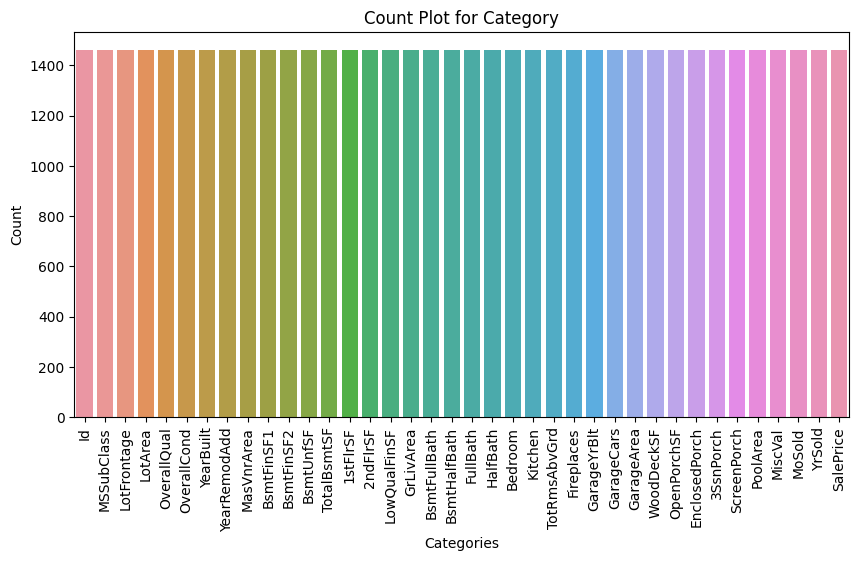

In [ ]:
#b)	Count plot for bivariate analysis

plt.figure(figsize=(10, 5))
sns.countplot(data=dataframe)
plt.title('Count Plot for Category')

plt.xlabel('Categories')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

In [ ]:
#c)	Identify significant variables using p-values and Chi-Square values

# Create an empty list to store significant variables
significant_variables = []

#here Iterating over each column in the DataFrame (assuming the last column is the target variable)
for column in dataframe.columns[:-1]:
    # Create a contingency table between the current column and the target variable
    contingency_table = pd.crosstab(dataframe[column], dataframe[dataframe.columns[-1]])
    
    # Performing the chi-square test
    chi2, p, _, _ = chi2_contingency(contingency_table)
    
    # Checking if the p-value is below the desired significance level 
    if p < 0.05:
        significant_variables.append(column)

# Print the significant variables
print("Significant variables:")
for variable in significant_variables:
    print(variable)

Significant variables:
MSZoning
LotFrontage
LotArea
Street
LotShape
LotConfig
Neighborhood
OverallQual
OverallCond
MasVnrType
MasVnrArea
ExterQual
ExterCond
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtUnfSF
TotalBsmtSF
Heating
CentralAir
1stFlrSF
2ndFlrSF
GrLivArea
BsmtHalfBath
FullBath
HalfBath
KitchenQual
TotRmsAbvGrd
Fireplaces
GarageFinish
GarageCars
GarageArea
WoodDeckSF
OpenPorchSF
SaleType
SaleCondition


In [ ]:


print(sorted(significance.items(), key=lambda x: x[1]['p-value']))

[]


In [ ]:
#5)	Combine all the significant categorical and numerical variables

print(pd.concat([categorical_dataframe, numerical_dataframe], axis=1))

     MSZoning Street Alley LotShape LandContour Utilities LotConfig LandSlope  \
0          RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1          RL   Pave   NaN      Reg         Lvl    AllPub       FR2       Gtl   
2          RL   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl   
3          RL   Pave   NaN      IR1         Lvl    AllPub    Corner       Gtl   
4          RL   Pave   NaN      IR1         Lvl    AllPub       FR2       Gtl   
...       ...    ...   ...      ...         ...       ...       ...       ...   
1455       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1456       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1457       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1458       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1459       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   

     Neighborhood Condition

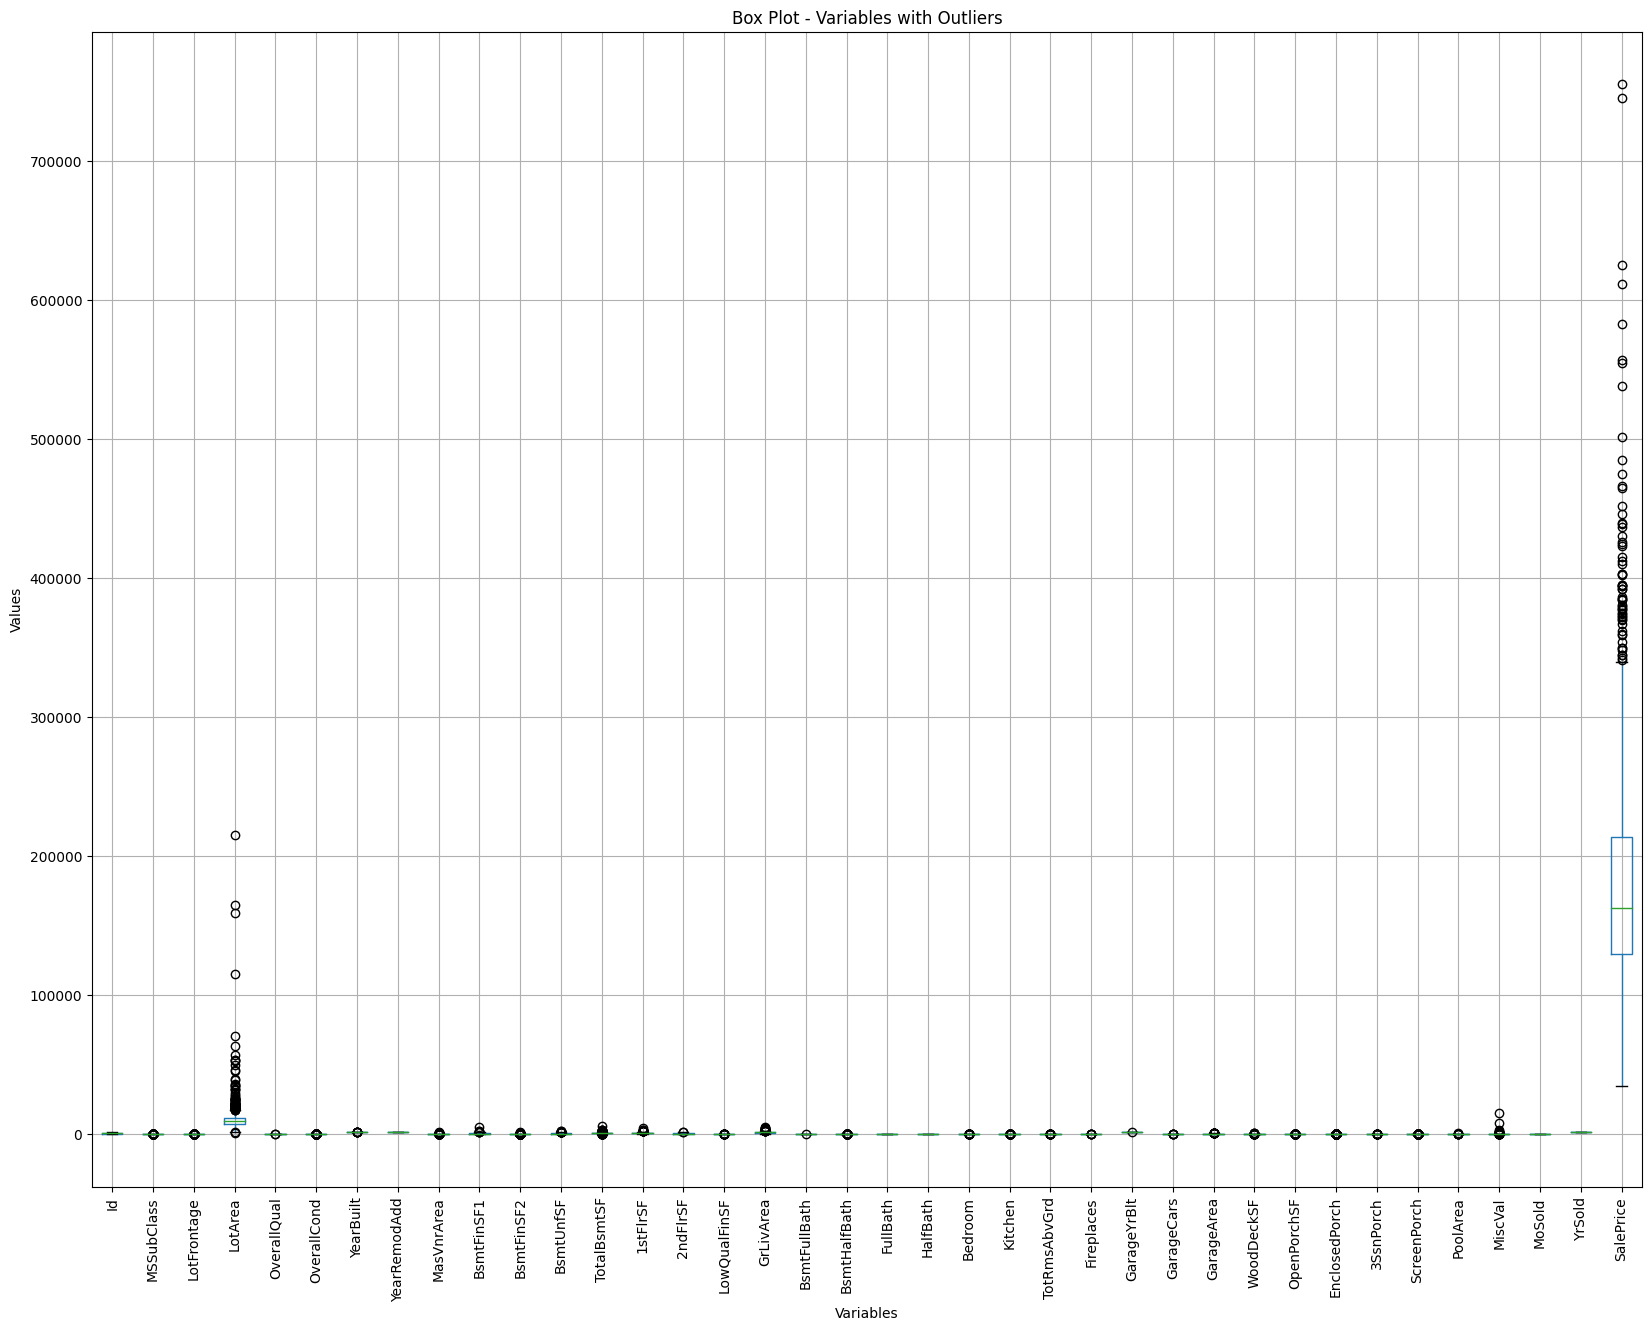

In [ ]:
#6)	Plot box plot for the new dataset to find the variables with outliers
plt.figure(figsize=(20, 15))  # Set the size of the figure

# Plot the box plot for the entire dataset
dataframe.boxplot()

# Set the title and labels for the plot
plt.title('Box Plot - Variables with Outliers')
plt.xlabel('Variables')
plt.ylabel('Values')
plt.xticks(rotation=90)
# Show the plot
plt.show()